In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
masoudnickparvar_brain_tumor_mri_dataset_path = kagglehub.dataset_download('masoudnickparvar/brain-tumor-mri-dataset')

print('Data source import complete.')


100%|██████████| 149M/149M [00:00<00:00, 199MB/s]

Extracting files...


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input director

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
#import potrebnih biblioteka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adamax


from sklearn.metrics import classification_report, confusion_matrix

In [7]:
import os

# Access the path of the 'Training' folder
training_path = os.path.join(masoudnickparvar_brain_tumor_mri_dataset_path, 'Training')

# Print the path
print(training_path)

/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training


In [8]:
#učitavanje slika na trening setu
train_dir='/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training'

image_paths=[]
labels=[]

folds=os.listdir(train_dir)

for fold in folds:
    foldpath=os.path.join(train_dir,fold)

    images=os.listdir(foldpath)

    for i in images:
        ipath=os.path.join(foldpath,i)

        image_paths.append(ipath)
        labels.append(fold)

train_df = pd.DataFrame(data = {'Filepaths':image_paths,'Labels':labels})
train_df


,Filepaths,Labels
0,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
1,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
2,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
3,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
4,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
...,...,...
5707,/root/.cache/kagglehub/datasets/masoudnickparv...,glioma
5708,/root/.cache/kagglehub/datasets/masoudnickparv...,glioma
5709,/root/.cache/kagglehub/datasets/masoudnickparv...,glioma
5710,/root/.cache/kagglehub/datasets/masoudnickparv...,glioma


In [9]:
#učitavanje slika na testnom setu
test_dir='/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing'

image_paths=[]
labels=[]

folds=os.listdir(test_dir)

for fold in folds:
    foldpath=os.path.join(test_dir,fold)

    images=os.listdir(foldpath)

    for i in images:
        ipath=os.path.join(foldpath,i)

        image_paths.append(ipath)
        labels.append(fold)

test_df = pd.DataFrame(data = {'Filepaths':image_paths,'Labels':labels})
test_df

,Filepaths,Labels
0,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
1,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
2,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
3,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
4,/root/.cache/kagglehub/datasets/masoudnickparv...,notumor
...,...,...
1306,/root/.cache/kagglehub/datasets/masoudnickparv...,glioma
1307,/root/.cache/kagglehub/datasets/masoudnickparv...,glioma
1308,/root/.cache/kagglehub/datasets/masoudnickparv...,glioma
1309,/root/.cache/kagglehub/datasets/masoudnickparv...,glioma


In [10]:
#razdvajanje na validation i test data
valid_df,test_Df=train_test_split(test_df,test_size=0.5,random_state=42)

In [11]:
#preprocessing slika

gen=ImageDataGenerator()

train_gen = gen.flow_from_dataframe(train_df, x_col='Filepaths', y_col='Labels', target_size=(224,224),
                                   color_mode='rgb', class_mode='categorical' , batch_size=16)

valid_gen = gen.flow_from_dataframe(valid_df, x_col='Filepaths', y_col='Labels', target_size=(224, 224),
                                   color_mode='rgb', class_mode='categorical' , batch_size=16)

test_gen = gen.flow_from_dataframe(test_Df, x_col='Filepaths', y_col='Labels', target_size=(224, 224),
                                   color_mode='rgb', class_mode='categorical' , batch_size=16)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


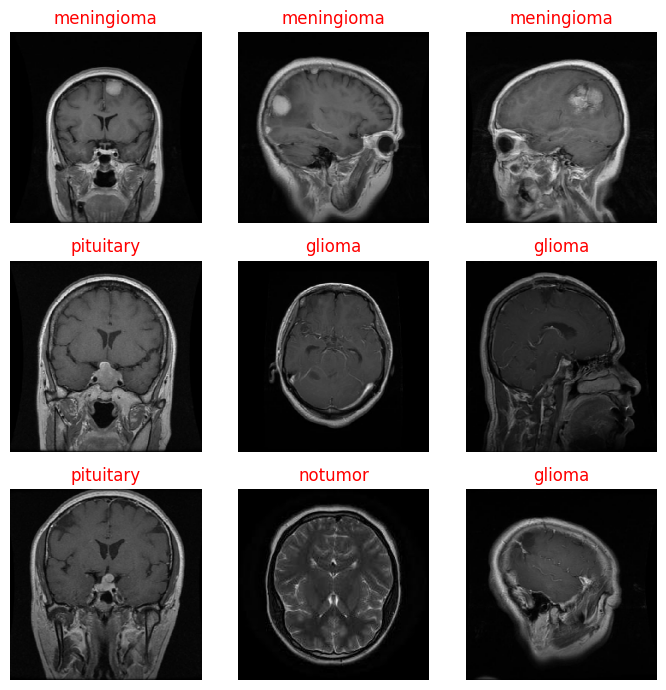

In [12]:
#vizualizacija trening podataka
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

#Plot 9 slika
plt.figure(figsize= (7, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'red', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
#definisanje slojeva i modela
model = Sequential()

model.add(Conv2D(1024, (3, 3), activation='relu', input_shape=(224, 224, 3))) #first convolution block
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))   #second convolution block
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))  #third convolution block
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu')) #fourth convolution block
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())                            # flattening

model.add(Dense(256, activation='relu'))        #hidden 256
model.add(Dense(128, activation='relu'))        #hidden 128
model.add(Dense(4, activation='softmax'))       # output 4

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#definisanje optimajzera i funkcije pogreške
model.compile(optimizer=Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
#puštanje modela
history = model.fit(train_gen, validation_data= valid_gen, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 419s 978ms/step - accuracy: 0.6145 - loss: 11.0779 - val_accuracy: 0.7893 - val_loss: 0.5400
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 325s 837ms/step - accuracy: 0.8556 - loss: 0.4045 - val_accuracy: 0.8351 - val_loss: 0.3969
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 322s 838ms/step - accuracy: 0.8960 - loss: 0.2866 - val_accuracy: 0.8656 - val_loss: 0.3434
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 319s 831ms/step - accuracy: 0.9223 - loss: 0.2169 - val_accuracy: 0.9099 - val_loss: 0.2292
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 301s 842ms/step - accuracy: 0.9432 - loss: 0.1631 - val_accuracy: 0.8992 - val_loss: 0.2746
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 318s 831ms/step - accuracy: 0.9502 - loss: 0.1395 - val_accuracy: 0.9282 - val_loss: 0.1888
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 321s 830ms/step - accuracy: 0.9634 - loss: 0.1022 - val_accuracy: 0.9267 - val_loss: 0.1769
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 322s 831ms/step - accuracy: 0.9687 - loss: 0.0

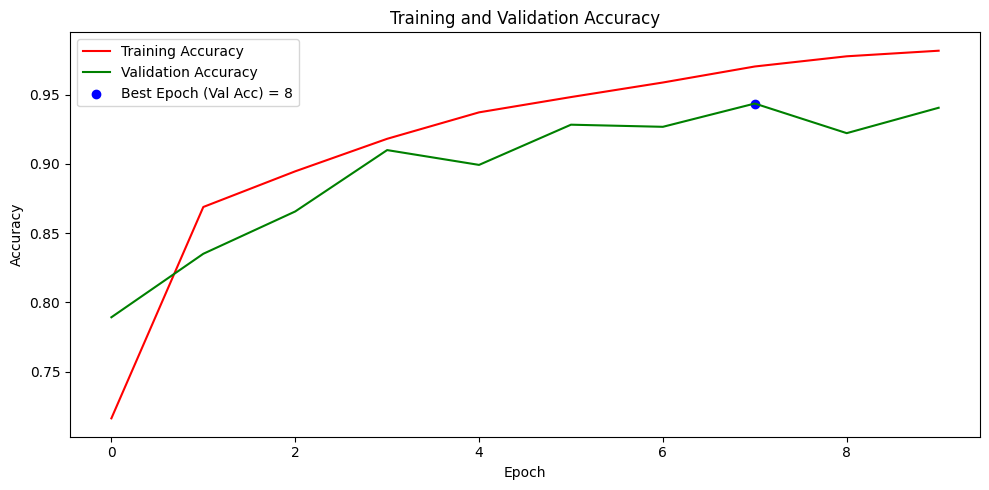

In [21]:
#vizualizacija rezultata accuracy sa najboljom epohom
tr_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
best_epoch_acc = np.argmax(history.history['val_accuracy'])
best_val_accuracy = history.history['val_accuracy'][best_epoch_acc]


#accuracy
plt.figure(figsize=(10, 5))
plt.plot(tr_acc, color='red', label='Training Accuracy')
plt.plot(val_acc,color='green', label='Validation Accuracy')
plt.scatter(best_epoch_acc, best_val_accuracy, color='blue', label=f'Best Epoch (Val Acc) = {best_epoch_acc+1}')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



plt.tight_layout()
plt.show()

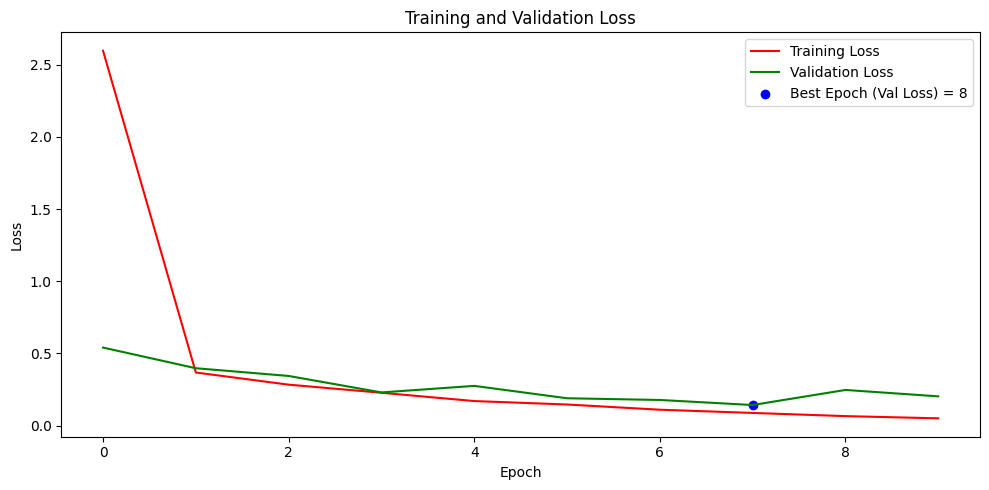

In [20]:
#vizualizacija rezultata loss sa najboljom epohom
tr_loss=history.history['loss']
val_loss=history.history['val_loss']
best_epoch_loss = np.argmin(history.history['val_loss'])
best_val_loss = history.history['val_loss'][best_epoch_loss]

#loss
plt.figure(figsize=(10, 5))
plt.plot(tr_loss,color="red",label='Training Loss')
plt.plot(val_loss,color="green", label='Validation Loss')
plt.scatter(best_epoch_loss, best_val_loss, color='blue', label=f'Best Epoch (Val Loss) = {best_epoch_loss+1}')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
#prikaz skorova trening,validation,test
train_score = model.evaluate(train_gen)
valid_score = model.evaluate(valid_gen)
test_score = model.evaluate(test_gen)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


357/357 ━━━━━━━━━━━━━━━━━━━━ 73s 205ms/step - accuracy: 0.9801 - loss: 0.0445
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 203ms/step - accuracy: 0.9604 - loss: 0.1407
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 203ms/step - accuracy: 0.9538 - loss: 0.1691
Train Loss:  0.049110010266304016
Train Accuracy:  0.9796918630599976
--------------------
Validation Loss:  0.20203948020935059
Validation Accuracy:  0.9404579997062683
--------------------
Test Loss:  0.18618148565292358
Test Accuracy:  0.9405487775802612


In [ ]:
#spremanje modela
model.save('Brain MRI-CNN 0.01.h5')